# Utils

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Problem: classification (logistic regression)

We will classify a point cloud defined by $m$ points $\{(x^{(i)}, y^{(i)})\}_0^m$ where $x^{(i)} = \begin{pmatrix}x^{(i)}_1 \\ \vdots \\ x^{(i)}_n\end{pmatrix} $ and $y^{(i)} \in \{0, 1\} \quad \forall i \in \{1 \cdots m\}$.

We define $X$ as the design matrix, such as $X = 
\begin{pmatrix}
  1 & x^{(2)}_1 & \cdots & x^{(n)}_1 \\
  \vdots & \vdots & \ddots & \vdots \\
  1 & x^{(2)}_m & \cdots & x^{(n)}_m
\end{pmatrix} $
and $ y =
\begin{pmatrix}
  y^{(1)} \\
  \vdots \\
  y^{(m)} \\
\end{pmatrix}$

We define the decision boudary as $ y = f(X) $ where $ f(x) = \begin{cases} 1 & \text{if } u^Tx > 0 \\ 0 & \text{otherwise } \end{cases} $

In [0]:
u = np.array([0.5, 2, -3])
f = lambda x: np.dot(x, u) > 0

The dataset contains $m$ training examples of size $n$, we define the inputs

In [0]:
m = 100
n = 3

X = np.zeros((m, n-1))
X[:, 0] = np.random.normal(0.5, 0.1, m)
X[:, 1] = np.random.normal(0.5, 0.1, m)

We normalize our inputs: $ X = \frac{1}{\sigma_x} (X - \mu_x) $
where $ \mu_x = 
\begin{pmatrix}
  \mu_{x_1} \\
  \vdots \\
  \mu_{x_m} \\
\end{pmatrix}
$ is the mean of each feature, and 
$ \sigma_x = 
\begin{pmatrix}
  \sigma_{x_1} \\
  \vdots \\
  \sigma_{x_m} \\
\end{pmatrix}
$ is the standard deviation of each feature

In [0]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

We add the bias

In [0]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)
assert X.shape == (m, n)

Target values are $y = f(X)$

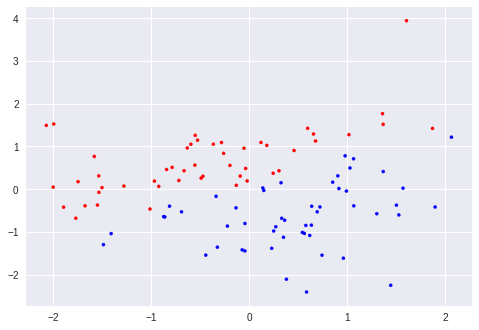

In [6]:
y = f(X)
colors = ['blue' if e else 'red' for e in y]

_ = plt.scatter(X[:, 1], X[:, 2], s=10, c=colors)

# Method

We will use the prediction function $h(x) = \frac{1}{1 + e^{-\theta^Tx}}=g(\theta^Tx)$ where $g:x \mapsto \frac{1}{1 + e^{-x}}$ is the sigmoid function and $\theta \in \mathbb{R}^n $

In [0]:
th = np.zeros(n)

g = lambda x: 1 / (1 + np.exp(-x))
h = lambda x: g( np.dot(x, th) )

We set our loss function:



> $L(\theta) = \frac {1}{m}\sum_{0}^{m}Cost(h(x^{(i)}), y^{(i)}) + \frac 1 {2m} \lambda \sum_0^n \theta_i^2$,

> where $Cost(h(x), y) = 
  \begin{cases}
    -log(h(x)) & \text{if } y=1\\
    -log(1-h(x)) & \text{if } y=0
  \end{cases} \quad = - y \cdot log(h(x)) - (1-y) \cdot log(1 - h(x)) $

In [0]:
regularization = 0.01

cost = lambda x, y: -( y * np.log(h(x)) + (1-y) * np.log(1 - h(x)))
getLoss = lambda : (sum(cost(X, y)) + regularization * np.dot(th[1:], th[1:])) / m

**Gradient descent gives**


> $\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} L(\theta) \quad \forall j \in \{1...n\} $, or simply

> $\theta = \theta - \alpha \mathrm{J}^T, \quad \text{where} \; \mathrm{J} =  \begin{pmatrix}\frac{\partial L}{\partial \theta_0} & ... & \frac{\partial L}{\partial \theta_n} \end{pmatrix} $

In [0]:
def gradient_descent(alpha):
  
  J = dL(X, y)
  
  new_th = th * (1 - alpha * regularization / m) - alpha * J
  
  return new_th

Where we have to compute:

> $ \frac{\partial}{\partial \theta_j} L(\theta) = \frac {1}{m}\sum_{0}^{m}(h(x^{(i)}) - y^{(i)}) \cdot x^{(i)}_j + \frac {\lambda} {m} \theta_j \quad $ (proof below), so

> $ \mathrm{J} = \frac{1}{m}(h(X) - y)^Tx + \lambda \theta = \mathrm{J'} + \frac {\lambda} {m} \theta_j $

Our update rule becomes:

> $\theta = \theta - \alpha \mathrm{J}^T = \theta(1 - \frac {\alpha \lambda} {m} ) - \alpha \mathrm{J'}^T $



In [0]:
 def dL(X, y):
  return np.dot((h(X) - y), X)/m

# Proof

We will show that $ \frac{\partial}{\partial \theta_j} L(\theta) = \frac {1}{m}\sum_{0}^{m}(h(x^{(i)}) - y^{(i)}) \cdot x^{(i)}_j + \frac {\lambda} {m} \theta_j $


Let $j \in \{1 \cdots n \}, \quad \frac{\partial L}{\partial \theta_j} = \frac {1}{m}\sum_{0}^{m} \frac{\partial}{\partial \theta_j}Cost(h(x^{(i)}), y^{(i)}) + \frac 1 {2 m} \frac{\partial}{\partial \theta_j} \sum_0^n \theta_k^2$

> $ \begin{align}
\frac{\partial}{\partial \theta_j}Cost(h(x), y)
&= (1-y) \cdot \frac{\partial h}{\partial \theta_j} \frac{1}{1 - h(x)} - y \cdot \frac{\partial h}{\partial \theta_j} \frac{1}{h(x)}, \text{ where }
  \frac{\partial h}{\partial \theta_j} = x_j \cdot e^{-\theta^Tx} \frac{1}{(1 + e^{-\theta^Tx})^2} = x_j \cdot e^{-\theta^Tx} \cdot h(x)^2, \text{ so } \\
&= (1-y) \cdot x_j \cdot e^{-\theta^Tx} \frac{h(x)^2}{1 - h(x)} - y \cdot x_j \cdot e^{-\theta^Tx} \cdot h(x) \\
&= (1-y) \cdot x_j \cdot e^{-\theta^Tx} h(x) - y \cdot x_j \cdot e^{-\theta^Tx} \cdot h(x)  \\
&= [h(x) - y \cdot h(x) \cdot (1 + e^{-\theta^Tx})] \cdot x_j \\
&= (h(x) - y)x_j
\end{align} $

> $ \frac 1 {2m} \frac{\partial}{\partial \theta_j} \sum_0^n \theta_k^2 = \frac {\lambda} {m} \theta_j
$

When we replace in the first equation we get $ \frac{\partial}{\partial \theta_j} L(\theta) = \frac {1}{m}\sum_{0}^{m}(h(x^{(i)}) - y^{(i)}) \cdot x^{(i)}_j + \frac {\lambda} {m} \theta_j $

# Training

We set $\alpha$ to a small value, and train $epochs$ time

In [0]:
alpha = 0.1
epochs = 1000
th = np.zeros(n)

loss: 0.1188


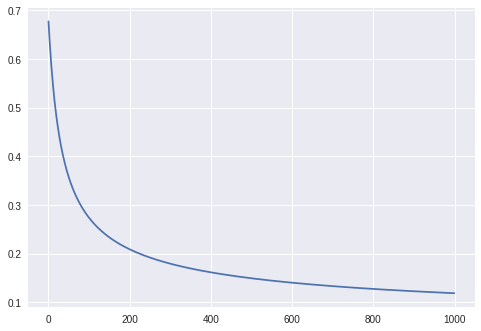

In [12]:
loss_history = np.zeros(epochs)

for i_epoch in range(epochs):
  th = gradient_descent(alpha)
  loss_history[i_epoch] = getLoss()

_ = plt.plot(loss_history)
print("loss: {:.4f}".format(loss_history[-1]))

# Testing

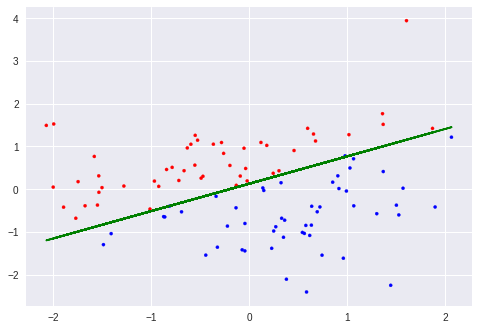

In [13]:
prediction = h(X)
prediction = [1 if e>0.5 else 0 for e in prediction]

boudary = - np.dot(X[:, :2], th[:2]) / th[2]

_ = plt.scatter(X[:, 1], X[:, 2], s=10, c=colors)
_ = plt.plot(X[:, 1], boudary, "g-")
